In [75]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyClassifier,DummyRegressor
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import norm, skew
from scipy import stats
RANDOM_STATE = 42

NameError: name 'sys' is not defined

In [2]:
tweets = pd.read_csv('../data/cleaned_tweets.csv')
tweets

,tweet_id,username,text,tweet_date,search_term,city,lat,long,radius,query_start,name_and_tweet,outage_sentiment,state
0,710245730590404608,ttwn sf bay area,power outage in cupertino bayarea traffic,2016-03-16 23:25:52,power outage,San Jose,37.332300,-121.853394,10mi,2016-01-01,ttwn sf bay area power outage in cupertino bay...,0.33,California
1,708811502241734656,san jose now,weather alert flash flood watch in bay area am...,2016-03-13 00:26:45,power outage,San Jose,37.332300,-121.853394,10mi,2016-01-01,san jose now weather alert flash flood watch i...,0.25,California
2,706856719733776384,san jose now,power outages in san francisco on peninsula in...,2016-03-07 14:59:09,power outage,San Jose,37.332300,-121.853394,10mi,2016-01-01,san jose now power outages in san francisco on...,0.18,California
3,726876023573204993,san jose now,power outage in fremont several intersections ...,2016-05-01 20:48:43,power outage,San Jose,37.332300,-121.853394,10mi,2016-01-01,san jose now power outage in fremont several i...,0.23,California
4,724681945095888897,san jose now,east bay power outages also affects bart uc be...,2016-04-25 19:30:14,power outage,San Jose,37.332300,-121.853394,10mi,2016-01-01,san jose now east bay power outages also affec...,0.20,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16908,1138224668207407106,katy blakey,if like me you wondered what to do about the...,2019-06-10 23:21:22,#poweroutage,Dallas,32.776665,-96.796989,15mi,2016-01-01,katy blakey if like me you wondered what to ...,0.10,Texas
16909,1138224130631843840,t r e y,this dallas poweroutage has gone to far the pa...,2019-06-10 23:19:14,#poweroutage,Dallas,32.776665,-96.796989,15mi,2016-01-01,t r e y this dallas poweroutage has gone to fa...,0.12,Texas
16910,1138140304341635073,charity advertising marketing partners,cant stop wont stop dallasweather thunderstor...,2019-06-10 17:46:08,#poweroutage,Dallas,32.776665,-96.796989,15mi,2016-01-01,charity advertising marketing partners cant s...,0.07,Texas
16911,1138102344728666113,eisemann center,power ac wifi if anyone needs a place to chil...,2019-06-10 15:15:18,#poweroutage,Dallas,32.776665,-96.796989,15mi,2016-01-01,eisemann center power ac wifi if anyone needs...,0.11,Texas


In [93]:
states = tweets['state'].value_counts().index
states

Index(['California', 'Texas', 'New York', 'Michigan'], dtype='object')

In [83]:
search_bystate = tweets.groupby('search_term')['state'].value_counts(sort=True)
search_bystate

search_term                        state     
#poweroutage                       California    151 
                                   New York      52  
                                   Texas         33  
                                   Michigan      29  
CNPalerts AND power outage         Texas         6   
ConED AND service                  New York      13  
National Grid AND outage           New York      5   
National Grid AND power            New York      19  
National Grid AND service          New York      8   
PG&E AND outage                    California    46  
PG&E AND power                     California    104 
RG&E AND power                     New York      10  
RG&E AND service                   New York      5   
SDG&E AND outage                   California    10  
SDG&E AND power                    California    20  
SDGE AND outage                    California    43  
SDGE AND power                     California    71  
centerpoint energy AND outage      T

ValueError: Neither the `x` nor `y` variable appears to be numeric.

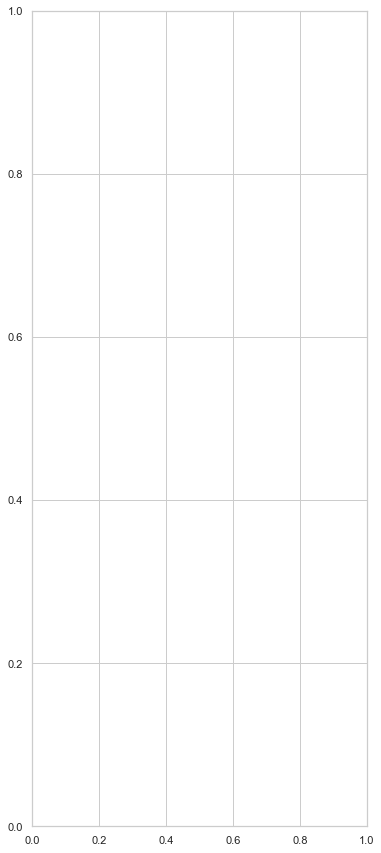

In [92]:
sns.set(style="whitegrid")

search_terms_chart = ['power off','power out','power outage','service interruption', 
                      'transformer AND power', '#poweroutage', 'power failure', 'power cut', 
                      'electric off', 'electric out', 'lost power']

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=(tweets['state']=='Michigan'), y=search_terms_chart, data=tweets,
            label="Michigan", color="b")

# Plot the crashes where alcohol was involved
##sns.set_color_codes("muted")
##sns.barplot(x="alcohol", y="abbrev", data=crashes,
##            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
##ax.legend(ncol=2, loc="lower right", frameon=True)
##ax.set(xlim=(0, 24), ylabel="",
##       xlabel="Automobile collisions per billion miles")
##sns.despine(left=True, bottom=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,8), sharex=True) # unpack graphs
# add title to entire figure
ax1.barh(y=server_top_words.index,width=server_top_words,color='#5f7d95') 
ax2.barh(y=retail_top_words.index,width=retail_top_words,color='#00c9a2')
ax1.set_title('Top Words from TalesFromYourServer Subreddit\nr/TalesFromYourServer',size=14)
ax2.set_title('Top Words from TalesFromRetail Subreddit\nr/TalesFromRetail',size=14)
ax1.set_xlabel('Frequency',size=16)
ax2.set_xlabel('Frequency',size=16)
ax1.set_ylabel('Unique Words in Top 40', size=16)
ax2.set_ylabel('Unique Words in Top 40', size=16);

It appears that lights out is the top search term in our dataset. 

In [22]:
len(tweets[tweets['search_term']=='power outage']['text'])

1653

In [27]:
plt.bar(states,tweets.groupby('state')['outage_sentiment'].mean(), color = 'seagreen')
plt.title('Average Outage Sentiment by State',size=16)
plt.xlabel('State',size=13)
plt.ylabel('Average Outage Sentiment',size=13)
plt.xticks(size=12);

NameError: name 'states' is not defined

In [20]:
tweets[tweets['state']=='New York']['outage_sentiment']

7018     0.20
7019     0.18
7020     0.18
7021     0.23
7022     0.23
         ... 
10032    0.31
10033    0.35
10034    0.39
10035    0.35
10036    0.29
Name: outage_sentiment, Length: 3019, dtype: float64

In [82]:
pd.set_option('display.max_rows', None)

In [69]:
search_sent = tweets.groupby('search_term')['outage_sentiment'].mean().sort_values(ascending=False)
search_sent

search_term
dte AND power outage                 0.315758
National Grid AND outage             0.308000
SDGE AND outage                      0.297442
PG&E AND outage                      0.297174
PG&E AND power                       0.297019
SDG&E AND outage                     0.291000
dte energy AND outage                0.287826
consumers energy AND outage          0.270000
SDGE AND power                       0.254366
dte AND power                        0.238333
National Grid AND power              0.233684
power outage                         0.233097
centerpoint energy AND outage        0.228000
SDG&E AND power                      0.222500
National Grid AND service            0.212500
consumers energy AND power outage    0.212500
centerpoint energy AND power         0.210000
ConED AND service                    0.205385
transformer AND power                0.191908
service interruption                 0.186304
RG&E AND power                       0.182000
CNPalerts AND power ou

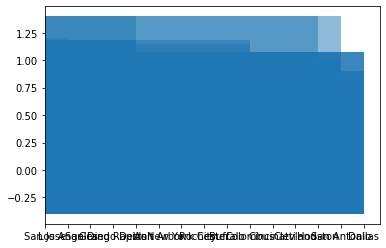

In [7]:
n_groups = 4
means_ohio = df['state']90, 55, 40, 65)
means_new_york = (85, 62, 54, 20)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Frank')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='g',
label='Guido')

plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
n = int(input("Enter the number of elements to be inserted: "))
a=[]
for i in range(0,n):
    elem=int(input("Enter element: "))
    a.append(elem)
avg=sum(a)/n
print("Average of elements in the list",round(avg,2))